<a href="https://colab.research.google.com/github/Israel-Garcilazo/EDP1/blob/main/EDP2_M%C3%A9todo_Colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Notebook para resolver por método de aproximación la siguiente EDP:
 $u''+u=x$

In [1]:

# exportación de librerías
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Inicialización de la solución propuesta.

In [2]:

# Definimos a la variable que guardará la función propuesta.
# posteriormente proponemos dicha función y calculamos sus derivadas.
x=sp.symbols('x')
a0,a1,a2,a3=sp.symbols('a0 a1 a2 a3')
uN=a0+a1*x+a2*x**2+a3*x**3
uN_p=sp.diff(uN,x)
uN_pp=sp.diff(uN_p,x)
uN, uN_p, uN_pp

(a0 + a1*x + a2*x**2 + a3*x**3, a1 + 2*a2*x + 3*a3*x**2, 2*a2 + 6*a3*x)

## Declaración de las condiciones iniciales.

In [3]:

# Asignamos un nombre para las condiciones iniciales.
eq1=sp.Eq(uN.subs(x,0),0)
eq2=sp.Eq(uN_p.subs(x,0),2)
sol_init=sp.solve([eq1,eq2],[a0,a1])
sol_init

{a0: 0, a1: 2}

In [4]:
uN_r=uN.subs(sol_init)
uN_pp_r=uN_pp.subs(sol_init)
uN_r, uN_pp_r

(a2*x**2 + a3*x**3 + 2*x, 2*a2 + 6*a3*x)

## Proceso de solución para las lambdas.

In [5]:

# Aplicamos las formulas para obtener las ecuaciones de los respectivos lambdas.
eps=uN_pp_r+uN_r-x
eqc1=sp.Eq(eps.subs(x,sp.Rational(1,2)),0)
eqc2=sp.Eq(eps.subs(x,1),0)
eqc1,eqc2

(Eq(9*a2/4 + 25*a3/8 + 1/2, 0), Eq(3*a2 + 7*a3 + 1, 0))

In [6]:

# Resolvemos de forma directa el sistema.
sol_rest=sp.solve([eqc1,eqc2],[a2,a3])
sol_rest

{a2: -1/17, a3: -2/17}

## Solución aproximada final.

In [7]:

# mostramos la solución calculada y sustituida.
u_approx=sp.simplify(uN_r.subs(sol_rest))
u_approx

x*(-2*x**2 - x + 34)/17

## Solución exacta del problema

Con lo anterior obtenido, comparamos con la solución exacta, que se calculará de forma directa mediante las bibliotecas de simpy.

In [8]:

# Solución exacta.
u=sp.Function('u')
ode=sp.Eq(sp.diff(u(x),x,2)+u(x), x)
u_exact=sp.dsolve(ode, ics={u(0):0, sp.diff(u(x),x).subs(x,0):2})
u_exact

Eq(u(x), x + sin(x))

## Funciones numéricas

In [9]:

# Creamos las funciones numéricas que luego nos ayudarán a graficar.
uA=sp.lambdify(x,u_approx,'numpy')
uE=sp.lambdify(x,u_exact.rhs,'numpy')

## Cálculo del error

In [10]:

# Calculamos el error.
xs=np.linspace(0,1,200)
err=np.abs(uE(xs)-uA(xs))
max(err)

np.float64(0.01794157304319066)

## Gráfica comparativa entre la solución real y exacta.

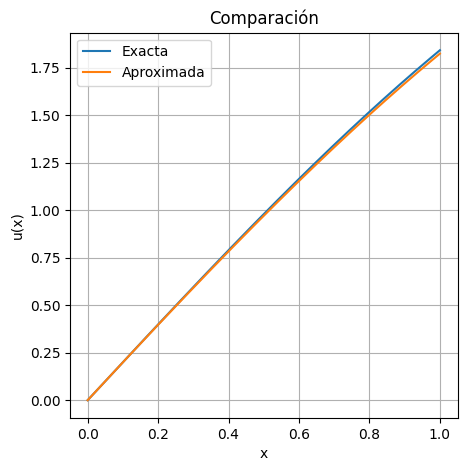

In [15]:
plt.figure(figsize=(5,5))
plt.plot(xs,uE(xs),label='Exacta')
plt.plot(xs,uA(xs),label='Aproximada')
plt.legend(); plt.grid(); plt.xlabel('x'); plt.ylabel('u(x)'); plt.title('Comparación');
plt.show()